In [1]:
include("cutoff.jl")

plot_single_coordinate_over_time (generic function with 1 method)

In [2]:
function L₂(x, y)
    """
    """
    sum = 0
    for i=1:length(x)
        sum += (x[i] - y[i])^2
    end
    √sum
end

L₂ (generic function with 1 method)

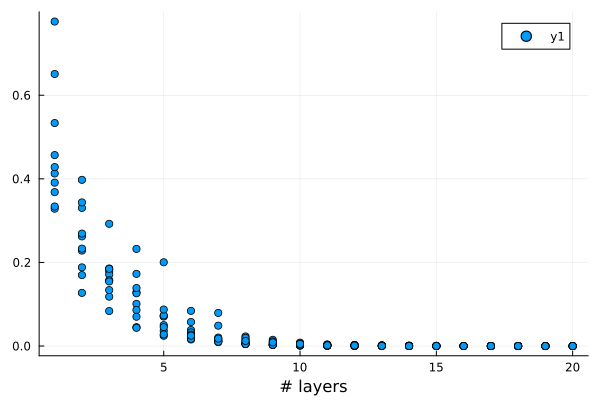

In [3]:
N = 5
X₀ = rand(Uniform(-1, 1), N)
num_chains = 10
Dist = Uniform(-1/√N, 1/√N)
# Dist = Normal(0.0, 1/√N)
# Dist = Normal(0.0, 1)
# activation = σ
activation = tanh
step_size = 0.001
num_steps = 20

Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps)
tvds, all_weights, all_steps = mc_tvds(Exp, verbose=false, store_steps=true)

zero_vec = zeros(N)

all_distances = []

xs = []
for step in eachindex(all_steps)
    distances = []
    for chain in all_steps[step]
        distance = L₂(chain, zero_vec)
        push!(distances, distance)
    end
    push!(all_distances, distances)
end

# plotting setup
xs = []
ys = []
for step in eachindex(all_steps)
    for distance in all_distances[step]
        push!(xs, step)
        push!(ys, distance)
    end
end


plot(xs, ys,
        xlabel="# layers",
        seriestype=:scatter,
#         xlim=(0, num_steps),
#         ylim=(-1.2, 1.2),
#         yticks = -1.2:0.2:1.2,
    )